## ARIMA  통해 Google 주식 예측해보기

### 시계열 데이터란

시간 순서대로 발생한 데이터의 수열을 말한다.
<br/>
시계열 데이터는 안정적(Sationary)데이터에 대해서만 예측이 가능하다.
<br/>
시계열 데이터 분석은 완벽하게 미래 예측을 보장할 수 없다. 예측하지 못한 외부적 변수에 의해 시계열 데이터 분석의 전제가 되는 안정성이 훼손될 수 있기 때문이다.

#### 안정적인 시계열(Stationary Time-series)

현실적으로 다루는 시계열 데이터는 직관적인 안정성의 정의를 만족하는 정도면 충분히 ARIMA 등의 시계열 모델을 통해 분석할 수 있다.

### Stationary 여부 확인 방법

#### ADF Test (Augmented Dickery-Fuller Test)

시계열 데이터의 안정성 테스트하는 통계적 방법이다.
<br/>
1. 주어진 시계열 데이터가 안정적이지 않다라는 귀무가설(Null Hypothesis)세움
2. 통계적 가설 검정 과정을 통해 귀무가설이 기각될 경우
3. 이 시계열 데이터가 안정적이다라는 대립가설(Alternative Hypothesis)을 채택한다.

ADF Test는 정상성(특정한 성질을 가진 일부분만 고려하는 것으로 안정성이라고도 함)을 알아보기 위한 단위근 검정 방식(확률변수가 안정적, 불안정  확인하는 방법) 

ADF 검정의 귀무가설은 DF검정과 같으므로 검정통계량인 Critical Vaule보다 작거나 p-value가 설정한 유의수준 값보다 작으면 정상적인 시계열 데이터라고 볼 수 있다.

p-vaule는 귀무가설을 가정했을 때 현재의 관측보다 더 극단적인 관측이 나올확률로 귀무가설의 가정이 틀렸다고 볼 수 있는 확률이다.

### 안정적인 시계열을 만드는 방법

#### 1. 데이터 가공, 변형하는 방법

##### 로그함수 변환

시간 추이(Trend)에 따라 분산이 점점 커지는 특성이 있는 데이터의 경우 사용하면 도움이 됨

##### Moving average 제거 - 추세(Trend)상세하기

시간 추이에 따라 나타나는 평균값 변화를 추세(Trend)라고 한다. 변화량 제거에는 Moving Average 즉, rolling mean을 구해서 ts_log 빼주면 된다.

Moving average 시에는 window size에 따라 결측치가 발생하기 때문에 데이터셋에서 제거해줘야한다.

#####  차분(Differncing)- 계절성(Seasonality)상쇄하기

시계열 데이터 안에 포함된 패턴이 파악되지 않은 주기적 변화는 예측에 방해되는 붕란정 요소기 때문에 제거해줘야 한다.

제거 방법으로는 차분(Differencing)이 있다. 미분의 개념으로 시계열을 한 스텝 앞으로 시프트한 시계열을 원래 시계열에 빼주는 방법으로 이번 스텝에서 발생한 변화량을 구할 수 있다.
<br/>
데이터에 따라 2차, 3차 차분을 적용하면 더욱 p-vaule을 낮출 수 있다.

#### 2. 시계열 분해(Time series decomposition)

statsmodel 라이브러리 안에 seasonal_decompose 메서드를 통해 시계열 안에 존재하는 trend, seasonality를 직접 분리해 낼 수 있다.

original 시계열에서 trend와 seaonality를 제거하고 난 나머지를 pesidual라고 한다
<br/>
Trend + Seanonality + Reidual= Original이 성립된다.
<br/>
Decomposing을 통해 얻어진 Residual은 제일 낮은 p-vaule을 보여준다.

### ARIMA 모델

시계열 데이터가 Trend와 Seadonality, Residual로 분해된다. 
<br/>
Trend와 Seadonality를 잘 분리해낸 경우 Residual이 예측력 있는 안정적인 시계열 데이터가 된다.

ARIMA(Autoregressice Integrated Moving Average)를 사용하면 해당 원리를 이용하여 시계열 데이터 예측 모델을 자동으로 만들 수 있다.

ARIMA는 AR(Autoregressive)+I(Integrated)+MA(Moving Average)

#### AR(자기 회귀)
과거 값들에 대한 회귀로 미래 값을 예측하는 방법이다. AT는 시계열의 Residual에 해당하는 부분을 모델링한다.
<br/>
주식값에서는 항상 일정한 균형 수준을 유지할 것이라고 예측하는 관점

#### MA (이동평균, Moving Average)
시계열의 Trend에 해당하는 부분을 모델링하는 것
<br/>
주식값이 최근의 증감 패턴을 지속할 것이라고 보는 관점

#### I (차분 누적, Integration)
시계열의 Seasonality에 해당하는 부분을 모델링한다고 볼 수 있다.

### ARIMA 모델 모수 p,q,d

ARIMA의 모수를 잘 설정해야 효과적으로 활용할 수 있다.
<br/>
p: 자기회귀 모형(AR)의 시차, d: 차분 누적횟수 , q: 이동평균 모형(MA)의 시차

p+q<2, p*q=0인 값을 사용한다. 즉, p or q 중 하나는 0이다.
<br>
많은 시계열 데이터가 AR이나 MA 중 하나의 경향만 가지기 때문!!

#### 모수 구하는 방식

#### ACF
시차에 따른 관측치들 사이의 관련성을 측정하는 함수로 주어진 시계열의 현재 값이 과거값과 어떻게 상관되는지 설명해준다.
<br/>
ACF x축은 상관계수, y축은 시차 수를 나타낸다.

#### PACF
다른 관측치의 영향력을 배제하고 두 시차의 관측치 간 관련성을 측정하는 함수
<br/>
k 이외의 모든 시차를 갖는 관측치의 영향력을 배제한 가운데 특정 두 관측치가 얼마나 관련있는지 나타내는 척도이다.

ACF는 MA 모델의 시차 q를 결정하고 PACF는 AR 모델의 시차 p를 결정할 수 있다.
<br/>
PACF이 0이라는 의미는 아무 상관 없는 데이터를 뜻함, 고려하지 않아도 된다.
<br/>
MA를 고려할 필요가 없는 경우는 q=0으로 둘 수 있다.하지만 q를 바꿔 가면서 확인하는 것도 좋다.

d는 d차 차분을 구해보고 시계열이 안정된 상태인지 확인해야 한다.

#### 시계열 예측 지표 MSE MAE RMSE  MAPE
참고 사이트: https://biology-statistics-programming.tistory.com/59

##### MSE
SSE(실제 관측값과 회귀식으로 예측한 값 차이의 제곱합)를 자유도로 나누어준 값
MSE 크다는 것은 데이터가 많아서 클수도 있지만 실제 차이가 커서 크다고 판단할 수 있게 되는 것

##### MAE (Mean Absolute Error)
실제 관측값과 회귀식으로 예측한 값 차이를 제곱합이 아닌 절대값의 합을 해주는 것
<br/>
MSE가 R2 norm이면 MAE는 R1 norm을 사용함

##### RMSE (Root Mean Squared error)
MSE에 루트를 씌우는 것

##### MAPE(Mean Absoulte Percentage Error)
MAE에서 실제 관측값과 회귀식으로 예측한 값 차이를 회귀식으로 예측한 값으로 나눈 절대값의 합
<br/>
MAE는 outlier에 취약할 수 있음(한 없이 커질 수 있다는 의미), MAPE는 최대 크기가 제한되므로 보완한 개념이라고 볼 수 있음

MAPE는 평균절대 백분율 오차로 정확도를 오차의 백분율로 표시한다. MAPE는 백분율이기 때문에 쉽게 이해할 수 있다.
<br/>
MAPE가 5이면 예측값은 평균 5%벗어나는 것을 의미함

### 1. 시계열 데이터 준비

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/GOOG.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']

ts.head()

Date
2021-02-16    2121.899902
2021-02-17    2128.310059
2021-02-18    2117.199951
2021-02-19    2101.139893
2021-02-22    2064.879883
Name: Close, dtype: float64

### 2. 전처리 수행

#### 결측치 처리

In [2]:
ts = ts.interpolate(method='time')
ts[ts.isna()]

Series([], Name: Close, dtype: float64)

Time Series에서 결측치가 있는 부분만 Series로 출력

#### 로그 변환

In [3]:
# 로그 변환 시도 
ts_log = np.log(ts)

### 시계열 안정성 분석

#### 정성적 그래프 분석

In [4]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

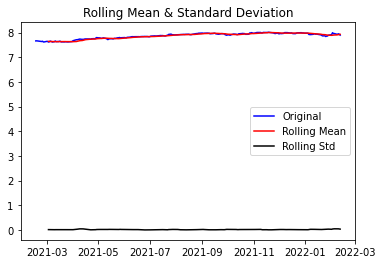

In [5]:
# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

#### 정량적 Augmented Dicky-Fuller Test

In [6]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메서드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메서드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [7]:
#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.707162
p-value                          0.427426
#Lags Used                       0.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64


#### 시계열 분해

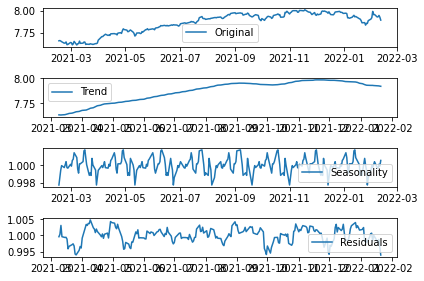

In [8]:
#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

#### Residual 안정성 확인

In [9]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                  -5.360071
p-value                          0.000004
#Lags Used                       6.000000
Number of Observations Used    215.000000
Critical Value (1%)             -3.461136
Critical Value (5%)             -2.875079
Critical Value (10%)            -2.573986
dtype: float64


Residual 안정성 결과 p-value가 0.000004로 나온것을 볼 수 있다. 즉, 극단적 결과가 관측될 확률이 작기 때문에 Stationary한 시계열 데이터라고 볼 수 있다.

### 4. 학습 데이터셋 생성

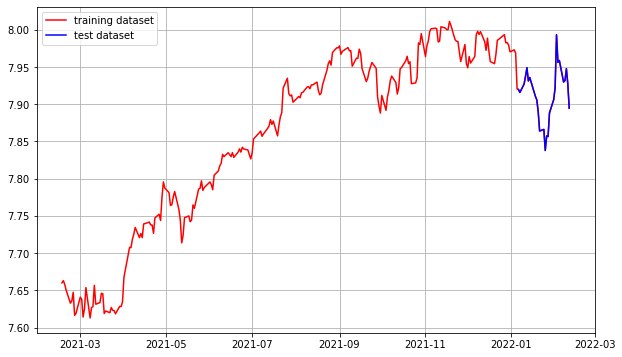

In [10]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

### 적정 ARIMA 모수 구하기

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


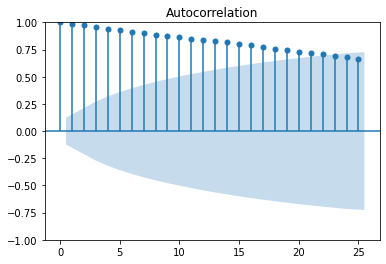

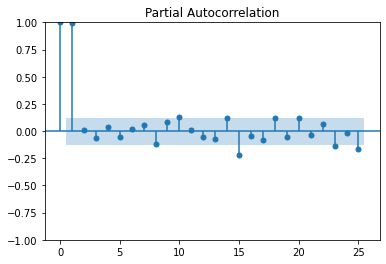

In [11]:
# ACF, PACF 그려보기 -> p,q 구하기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                -9.546176e+00
p-value                        2.645636e-16
#Lags Used                     2.000000e+00
Number of Observations Used    2.480000e+02
Critical Value (1%)           -3.456996e+00
Critical Value (5%)           -2.873266e+00
Critical Value (10%)          -2.573019e+00
dtype: float64


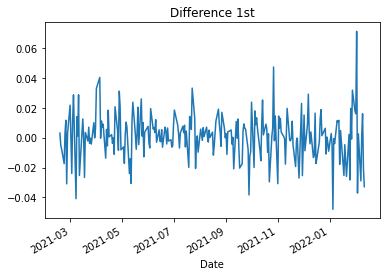

In [12]:
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -8.436205e+00
p-value                        1.813864e-13
#Lags Used                     1.400000e+01
Number of Observations Used    2.350000e+02
Critical Value (1%)           -3.458487e+00
Critical Value (5%)           -2.873919e+00
Critical Value (10%)          -2.573367e+00
dtype: float64


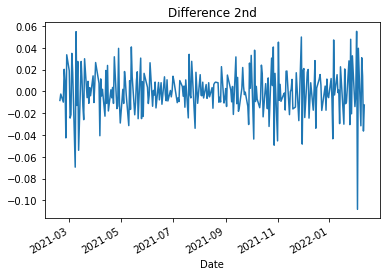

In [13]:
# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

### 6. ARIMA 모델 훈련 및 테스트

In [17]:
from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(2, 0, 2))  
fitted_m = model.fit() 

print(fitted_m.summary())

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  226
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 644.627
Date:                Tue, 15 Feb 2022   AIC                          -1277.254
Time:                        07:38:19   BIC                          -1256.731
Sample:                             0   HQIC                         -1268.972
                                - 226                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.7847      3.038      2.563      0.010       1.831      13.738
ar.L1          0.0540      0.084      0.647      0.518      -0.110       0.218
ar.L2          0.9453      0.083     11.326      0.0

/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


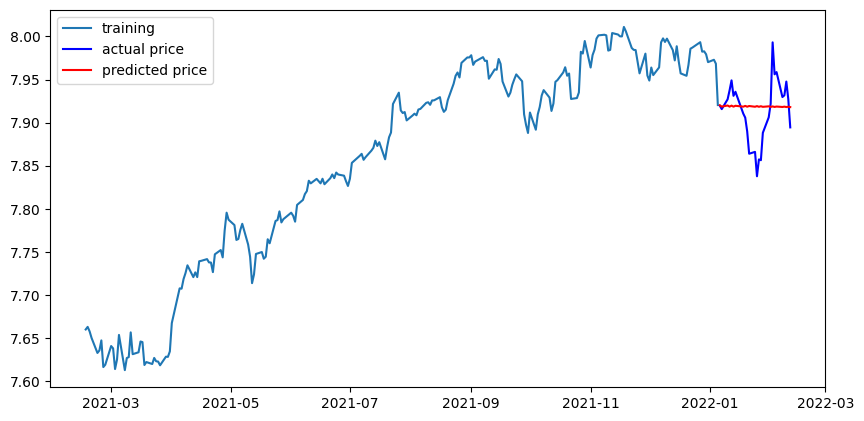

In [18]:
# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  9756.644563499776
MAE:  77.2443655979632
RMSE:  98.77572861538292
MAPE: 2.85%


### 결과 및 회고

In [20]:
from IPython.display import Image

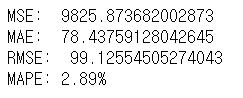

In [21]:
image_dir = os.getenv('HOME')+'/aiffel/stock_prediction/data/google_1차.png'
Image(image_dir)

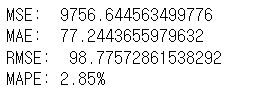

In [22]:
image_dir = os.getenv('HOME')+'/aiffel/stock_prediction/data/google_2차.png'
Image(image_dir)

google 주식을 활용하여 예측한 결과를 보면 1차분일 때는 2.89% 2차분일 때는 2.85%로 나타났다.
<br/>


ARIMA 모델의 모수에 변화를 줘도 결과 값이 크게 차이가 나지 않는 것으로 보아 현재 주식이 크게 변화가 있지 않을 것으로 판단된다.